<a href="https://colab.research.google.com/github/DScardini91/DScardini91/blob/main/IA_Apl_AG_Deap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

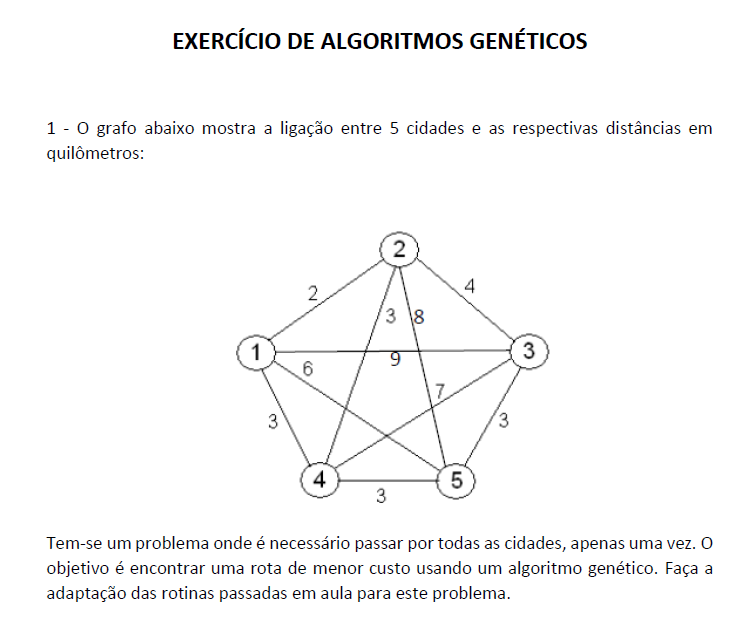

# Optimization problem using Genetic Algorithms

## Install deap lib - GA

In [286]:
!pip install deap

## Imports

In [287]:
import random
import numpy
from deap import base
from deap import creator
from deap import algorithms
from deap import tools

In [381]:
random.seed ()
 
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
 
cidades = [1,2,3,4,5]
scale = 40
 
toolbox = base.Toolbox()
 
toolbox.register("attr_list", random.sample, cidades, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_list, 1)
 
# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [382]:
def distancia (perna):
    switcher = {
        '12':2,
        '13':9,
        '14':3,
        '15':6,
        '21':2,
        '23':4,
        '24':3,
        '25':8,
        '31':9,
        '32':4,
        '34':7,
        '35':3,
        '41':3,
        '42':3,
        '43':7,
        '45':3,
        '51':6,
        '52':7,
        '53':3,
        '54':3
    }
 
    return switcher[perna]

In [383]:
def evalOneMax(individual):
    trajetos = []
    distancia_total = 0
    
    if (all(item in individual[0] for item in cidades)):
        for i in range(4):
          trajetos.append((str(individual[0][i]))+(str(individual[0][i+1])))
          distancia_total += distancia(trajetos[i])
          #print (trajetos)
          #print (distancia_total)
    else:
         distancia_total = scale

    fit_sc = (scale-distancia_total)/scale
    print(fit_sc)
    return (fit_sc,)


In [406]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=4)

In [414]:
def main():
    CXPB, MUTPB = 0.2, 0.05
    n=16
    scale=40
    pop = toolbox.population(n)

    
    
    print("Start of evolution")
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    #print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0
    
    # Begin the evolution
    while max(fits) < 10 and g < 200:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            #print('Child1',child1)
            #print('Child2',child2)
            # cross two individuals with probability CXPB
            if random.random() < CXPB:
                toolbox.mate(child1[0], child2[0])

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            #print('Mutant',mutant)
            # mutate an individual with probability MUTPB
            if random.random() < MUTPB:
                toolbox.mutate(mutant[0])
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
      #  print("  Evaluated %i individuals" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, ((1-best_ind.fitness.values[0])*scale)))

if __name__ == "__main__":
            main()

Start of evolution
0.475
0.525
0.6
0.5
0.425
0.45
0.5
0.5
0.525
0.525
0.5
0.375
0.5
0.475
0.725
0.525
-- Generation 1 --
0.725
0.6
0.0
  Min 0.0
  Max 0.725
  Avg 0.5828125
  Std 0.17426603898565557
-- Generation 2 --
0.6
0.6
0.725
0.725
0.725
0.725
0.725
0.725
  Min 0.6
  Max 0.725
  Avg 0.6937499999999999
  Std 0.05412658773652844
-- Generation 3 --
0.725
0.725
0.725
0.725
0.725
0.725
0.725
0.725
  Min 0.725
  Max 0.725
  Avg 0.7249999999999998
  Std 1.4901161193847656e-08
-- Generation 4 --
0.725
0.725
0.725
0.725
  Min 0.725
  Max 0.725
  Avg 0.7249999999999998
  Std 1.4901161193847656e-08
-- Generation 5 --
0.725
0.725
0.725
0.725
0.725
0.725
  Min 0.725
  Max 0.725
  Avg 0.7249999999999998
  Std 1.4901161193847656e-08
-- Generation 6 --
0.725
0.725
0.725
  Min 0.725
  Max 0.725
  Avg 0.7249999999999998
  Std 1.4901161193847656e-08
-- Generation 7 --
0.725
0.725
0.725
0.725
  Min 0.725
  Max 0.725
  Avg 0.7249999999999998
  Std 1.4901161193847656e-08
-- Generation 8 --
0.725
0.725